# Construire un cluster Kafka

Dans ce chapitre, vous allez au-delà du traitement par lots - exécuter des requêtes sur un ensemble complet de données - et découvrir les outils utilisés dans le traitement de flux. En traitement de flux, les données peuvent être infinies et incomplètes au moment d'une requête. L'un des principaux outils de gestion des données en continu est Apache Kafka. Kafka est un outil qui vous permet d'envoyer des données en temps réel aux sujets. Ces sujets peuvent être lus par les consommateurs qui traitent les données. Ce chapitre vous apprendra comment construire un cluster Apache Kafka à trois nœuds. Vous apprendrez également à créer et envoyer des messages (produire) et lire des données à partir de sujets (consommer)

## Création de clusters ZooKeeper et Kafka 

La plupart des didacticiels sur l'exécution d'applications pouvant être distribuées ne montrent souvent que comment exécuter un seul nœud et vous vous demandez ensuite comment exécuter cela en production. Dans cette section, vous allez créer un cluster ZooKeeper et Kafka à trois nœuds. Il fonctionnera sur une seule machine. Cependant, je diviserai chaque instance dans son propre dossier et chaque dossier simulera un serveur. La seule modification lors de l'exécution sur différents serveurs serait de changer localhost en IP du serveur. Le prochain chapitre détaillera le sujet d'Apache Kafka, mais pour l'instant, il suffit de comprendre que Kafka est un outil pour construire des flux de données en temps réel. Kafka a été développé sur LinkedIn et est maintenant un projet Apache. Vous pouvez trouver Kafka sur le Web à l'adresse http://kafka.apache.org. 


Kafka nécessite une autre application, ZooKeeper, pour gérer les informations sur le cluster, gérer la découverte et élire les dirigeants. Vous pouvez installer et créer vous-même un cluster ZooKeeper, mais pour cet exemple, vous utiliserez les scripts ZooKeeper fournis par Kafka. Pour en savoir plus sur ZooKeeper, vous pouvez le trouver sur http://zookeeper.apache.org. 

## Téléchargement de Kafka et configuration de l'environnement

Vous pouvez télécharger Apache Kafka à partir du site Web sous la section Téléchargements - ce qui est utile si vous voulez une version précédente - ou vous pouvez utiliser wget pour le télécharger à partir de la ligne de commande. Depuis votre répertoire personnel, exécutez les commandes suivantes :


    Wget https://downloads.apache.org/kafka/2.5.0/kafka_2.12-2.5.0.tgz
    tar -xvzf kafka_2.12-2.5.0.tgz


Les commandes précédentes téléchargent la version actuelle de Kafka et l'extraient dans le répertoire actuel. Étant donné que vous exécuterez trois nœuds, vous devrez créer trois dossiers distincts pour Kafka. Utilisez les commandes suivantes pour créer les répertoires :


    cp kafka_2.12-2.5.0 kafka_1
    cp kafka_2.12-2.5.0 kafka_2
    cp kafka_2.12-2.5.0 kafka_3


Vous aurez maintenant trois dossiers Kafka. Vous devrez également spécifier un répertoire de journal pour chaque instance de Kafka. Vous pouvez créer trois dossiers à l'aide de la commande mkdir, comme indiqué :


    mkdir logs_1
    mkdir logs_2
    mkdir logs_2

Ensuite, vous aurez besoin d'un dossier de données pour ZooKeeper. Créez le répertoire, puis-le à l'aide de cd, comme indiqué :


    mkdir data
    cd data

  
Vous exécuterez trois instances ZooKeeper, vous devrez donc créer un dossier pour chaque instance. Vous pouvez le faire en utilisant mkdir, comme indiqué :


    mkdir zookeeper_1
    mkdir zookeeper_2
    mkdir zookeeper_3


Chaque instance ZooKeeper a besoin d'un ID. Il recherchera un fichier nommé myid contenant une valeur entière. Dans chaque dossier, créez le fichier myid correspondant avec la valeur correcte. Les commandes suivantes créeront le fichier


    echo 1 > zookeeper_1/myide
    cho 2 > zookeeper_2/myid
    echo 3 > zookeeper_3/myid

Vous avez terminé les tâches préalables à la configuration de ZooKeeper et Kafka. Vous pouvez maintenant éditer les fichiers de configuration pour les deux. La section suivante vous guidera tout au long du processus.

## Configuration de ZooKeeper et Kafka

Les fichiers de configuration pour ZooKeeper et Kafka se trouvent dans le répertoire Kafka du dossier conf. Puisque vous avez trois répertoires Kafka, je vais les parcourir en utilisant Kafka_1 et les étapes devront être appliquées à tous les autres répertoires.



Depuis le répertoire ~/kafka_1/conf, vous devrez éditer le fichier zookeeper.properties. Vous allez éditer le répertoire de données et les serveurs, ainsi qu'ajouter des propriétés. Le fichier de configuration est affiché dans le bloc de code suivant, avec les modifications en gras (pour le fichier complet, se référer au repo GitHub) :




    # the directory where the snapshot is stored.
    dataDir=/home/paulcrickard/data/zookeeper_1
    # the port at which the clients will connect
    clientPort=2181
    # disable the per-ip limit on the number of connections since this is a non-production config
    maxClientCnxns=0
    # Disable the adminserver by default to avoid port conflicts.
    # Set the port to something non-conflicting if choosing to enable this
    admin.enableServer=false
    # admin.serverPort=8080
    tickTime=2000
    initLimit=5
    syncLimit=2
    server.1=localhost:2666:3666
    server.2=localhost:2667:3667
    server.3=localhost:2668:3668


Après avoir effectué les modifications, vous pouvez enregistrer le fichier. Il va maintenant falloir modifier ce fichier dans les répertoires kafka_2 et kafka_3. Notez que le paramètre dataDir se terminera par zookeeper_2 et zookeeper_3, respectivement. De plus, le numéro de port doit s'incrémenter de un à 2182 et 2183. Tout le reste restera le même. Encore une fois, la seule raison pour laquelle vous modifiez le répertoire et les ports est de pouvoir exécuter trois serveurs sur une seule machine. Sur trois serveurs distincts, vous laisseriez les paramètres tels qu'ils sont, en ne changeant que localhost à l'adresse IP du serveur. Maintenant que ZooKeeper est configuré, vous pouvez congurer Kafka. Dans le même répertoire conf, ouvrez le fichier server.properties. Le fichier est affiché avec les modifications en gras (pour le fichier complet, reportez-vous au référentiel GitHub) :



    ############################# Server Basics #############################
    # The id of the broker. This must be set to a unique integer for each broker.
    
    broker.id=1
    ############################# Socket Server Settings #############################
    # The address the socket server listens on. It will get the value returned from 
    # java.net.InetAddress.getCanonicalHostName() if not configured.
    #   FORMAT:
    #     listeners = listener_name://host_name:port
    #   EXAMPLE:
    #     listeners = PLAINTEXT://your.host.name:9092
    listeners=PLAINTEXT://localhost:9092
    
    ############################# Log Basics #############################
    # A comma separated list of directories under which to store log files
    
    log.dirs=/home/paulcrickard/logs_1
    
    ############################# Zookeeper 
    #############################
    # Zookeeper connection string (see zookeeper docs for details).
    # This is a comma separated host:port pairs, each corresponding to a zk
    # server. e.g. "127.0.0.1:3000,127.0.0.1:3001,127.0.0.1:3002".
    # You can also append an optional chroot string to the urls to specify the
    # root directory for all kafka znodes.
    
    zookeeper.connect=localhost:2181,localhost:2182,localhost:2183


Pour chaque répertoire Kafka, vous modifierez le fichier server.properties pour avoir un ID de courtier de 1, 2 et 3. Vous pouvez utiliser n'importe quel nombre entier, mais je les garde identiques aux noms de dossier. En outre, vous définirez les écouteurs sur localhost:9092, localhost:9093 et ​​localhost:9094. La propriété log.dirs sera définie sur chacun des dossiers log_1, log_2 et log_3. Les trois configurations auront la même valeur pour la propriété zookeeper.connect. Vous avez créé tous les répertoires nécessaires pour simuler trois serveurs et avez configuré ZooKeeper et Kaa. Vous pouvez maintenant passer au démarrage des clusters.

## Démarrage des clusters ZooKeeper et Kafka

Pour exécuter les serveurs, vous devrez ouvrir six terminaux - vous ne les exécuterez pas en arrière-plan



Dans les trois premiers terminaux, vous lancerez le cluster ZooKeeper. Dans chaque terminal, entrez le dossier Kafka pour chaque instance. Exécutez la commande suivante :



    bin/zookeeper-server-start.sh config/zookeeper.properties

Lorsque vous démarrez tous les serveurs, beaucoup de texte défile pendant que les serveurs en recherchent d'autres et organisent une élection. Une fois qu'ils se sont connectés, le texte s'arrêtera et le cluster sera prêt. Pour démarrer le cluster Kafka, entrez une instance du répertoire kafka dans chacun des trois terminaux restants. Vous pouvez ensuite exécuter la commande suivante dans chaque terminal


    bin/kafka-server-start.sh config/server.properties


Lorsque vous aurez terminé, vous aurez une ligne dans chaque terminal qui devrait ressembler à la ligne suivante :


    INFO [ZookeeperClient Kafka server] Connected. (kafka.zookeeper.zookeeperClient)



Vous avez maintenant deux clusters de trois nœuds en cours d'exécution pour ZooKeeper et Kafka. Pour tester les clusters et s'assurer que tout fonctionne correctement, la section suivante créera un sujet, un consommateur et un producteur, et enverra des messages.

## Test du cluster Kafka

Kafka est livré avec des scripts pour vous permettre d'effectuer certaines fonctions de base à partir de la ligne de commande. Pour tester le cluster, vous pouvez créer une rubrique, créer un producteur, envoyer des messages, puis créer un consommateur pour les lire. Si le consommateur peut les lire, votre cluster est en cours d'exécution.


    Pour créer un sujet, exécutez la commande suivante depuis votre répertoire kafka_1 :



    bin/kafka-topics.sh --create --zookeeper 
    localhost:2181,localhost:2182,localhost:2183 --replication-factor 2 --partitions 1 --topic dataengineering


La commande précédente exécute le script kafka-topics avec l'indicateur de création. Il spécie ensuite les adresses IP du cluster ZooKeeper et le sujet. Si le sujet a été créé, le terminal aura imprimé la ligne suivante :


    created topic dataengineering

Vous pouvez le vérifier en répertoriant tous les sujets du cluster Kafka à l'aide du même script, mais avec l'indicateur de liste :


    bin/kafka-topics.sh –list --zookeeper localhost:2181,localhost:2182,localhost:2183
  

    
Le résultat doit être une seule ligne : dataengineering. Maintenant que vous avez un sujet, vous pouvez envoyer et recevoir des messages dessus. La section suivante vous montrera comment.





## Tester le cluster avec des messages 

Dans les chapitres suivants, vous utiliserez Python pour envoyer et recevoir des messages, mais pour un test rapide du cluster, vous pouvez également utiliser les scripts fournis pour le faire. Pour créer un producteur, utilisez la commande suivante :


    bin/kafka-console-producer.sh --broker-list localhost:9092,localhost:9093,localhost:9094 --topic dataengineering


La commande précédente utilise le script kafka-console-producer avec l'indicateur de liste de courtiers qui transmet les serveurs de cluster kafka. Enfin, il faut un sujet, et comme nous n'en avons qu'un, c'est le dataengineering. Quand il est prêt, vous aurez une invite > dans laquelle taper des messages. Pour lire les messages, vous devrez utiliser le script kafka-console-consumer. La commande est comme indiqué :



    bin/kafka-console-consumer.sh --zookeeper localhost:2181,localhost:2182,localhost:2183 --topic dataengineering –from-beginning



Le consommateur passe le drapeau zookeeper avec la liste des serveurs. Il spécie également le sujet et le drapeau from-beginning. Si vous aviez déjà lu des messages, vous pourriez spécifier un drapeau de décalage avec l'index du dernier message afin que vous commenciez à partir de votre dernière position. En mettant les terminaux producteur et consommateur l'un à côté de l'autre,

 vous devriez avoir quelque chose comme la capture d'écran suivante :

 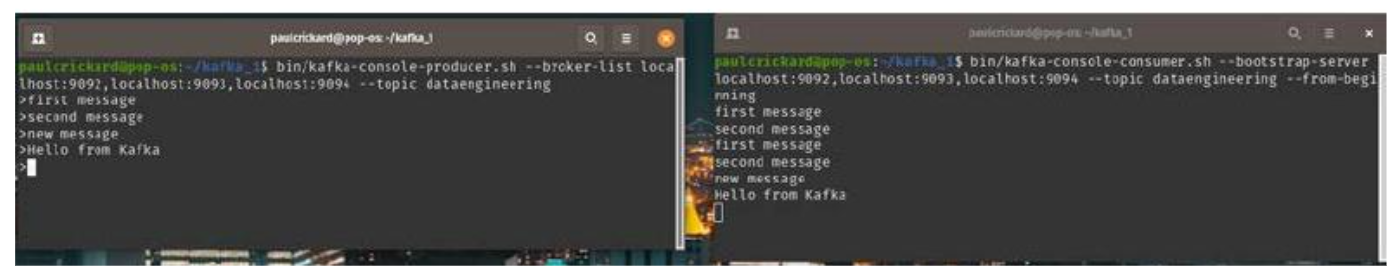

Dans la capture d'écran précédente, vous remarquerez que j'ai tapé deux fois le premier message et le deuxième message. Lorsque le consommateur s'est allumé, il a lu tous les messages sur le sujet. Une fois qu'il les aura tous lus, il attendra les nouveaux messages. Si vous saisissez un message dans le producteur, il apparaîtra dans la fenêtre du consommateur après un court délai. Vous disposez maintenant d'un cluster Kafka entièrement fonctionnel et êtes prêt à passer au traitement de flux avec Python dans le prochain chapitre.